In [1]:
import pandas as pd

In [2]:
df = pd.read_table("https://raw.githubusercontent.com/ADAPASASHANK/ADAPASASHANK/main/Restaurant_Reviews.tsv")
df

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [4]:
x = df['Review']
y = df['Liked']

In [5]:
x

0                               Wow... Loved this place.
1                                     Crust is not good.
2              Not tasty and the texture was just nasty.
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone.
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming, and I ...
999    Then, as if I hadn't wasted enough of my life ...
Name: Review, Length: 1000, dtype: object

In [6]:
y.head()

0    1
1    0
2    0
3    1
4    1
Name: Liked, dtype: int64

In [7]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [8]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
ps = PorterStemmer()
corpus = []
for i in range(0,len(x)):
  review = re.sub('[^a-zA-Z]', ' ',x[i] )
  review = review.lower()
  review = review.split()

  review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
  review = ' '.join(review)
  corpus.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [9]:
corpus

['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberri mmmm',
 'disgust pretti sure human hair',
 'shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'place worth time let alon vega',
 'like',
 'burritto blah',
 'food amaz',
 'servic also cute',
 'could care less interior beauti',
 'perform',
 'right red velvet cake ohhh stuff good',
 'never brought salad ask',
 'hole wall great mexican street taco friendli staff',
 'took hour get food tabl restaur food luke warm sever run around like total overwhelm',
 'worst salmon sashimi',
 'also combo like burger fri beer decent deal',
 'like final blow',
 'found place acc

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range = (1,3))
x = cv.fit_transform(corpus).toarray()

In [11]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.33,random_state = 0)

In [13]:
 import matplotlib.pyplot as plt

In [14]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example:
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [15]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()

In [16]:
from sklearn import metrics
import numpy as np
import itertools

accuracy:   0.758
Confusion matrix, without normalization


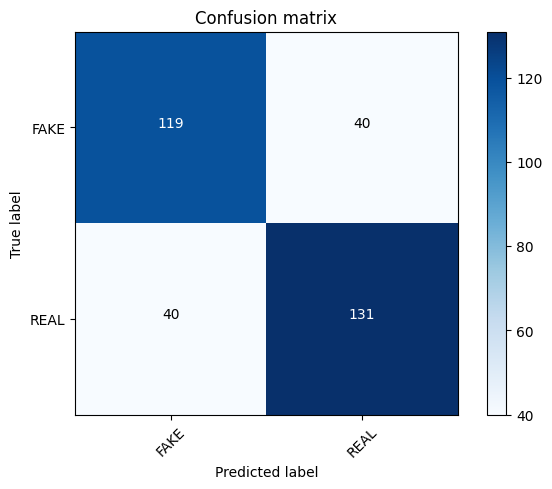

In [17]:
classifier.fit(x_train, y_train)
pred = classifier.predict(x_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [18]:
classifier.fit(x_train, y_train)
pred = classifier.predict(x_test)
score = metrics.accuracy_score(y_test, pred)
score

0.7575757575757576

In [19]:
classifier=MultinomialNB(alpha=0.1)

In [20]:
previous_score=0
for alpha in np.arange(0,1,0.1):
    sub_classifier=MultinomialNB(alpha=alpha)
    sub_classifier.fit(x_train,y_train)
    y_pred=sub_classifier.predict(x_test)
    score = metrics.accuracy_score(y_test, y_pred)
    if score>previous_score:
        classifier=sub_classifier
    print("Alpha: {}, Score : {}".format(alpha,score))

/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:629: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:635: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(


Alpha: 0.0, Score : 0.7424242424242424
Alpha: 0.1, Score : 0.7515151515151515
Alpha: 0.2, Score : 0.7606060606060606
Alpha: 0.30000000000000004, Score : 0.7606060606060606
Alpha: 0.4, Score : 0.7636363636363637
Alpha: 0.5, Score : 0.7666666666666667
Alpha: 0.6000000000000001, Score : 0.7666666666666667
Alpha: 0.7000000000000001, Score : 0.7666666666666667
Alpha: 0.8, Score : 0.7666666666666667
Alpha: 0.9, Score : 0.7606060606060606


In [21]:
## TFidf Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_v=TfidfVectorizer(max_features=5000,ngram_range=(1,3))
x1 = tfidf_v.fit_transform(corpus).toarray()

In [22]:
x1

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [23]:
## Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
x1_train, x1_test, y_train, y_test = train_test_split(x1, y, test_size=0.33, random_state=0)

accuracy:   0.782
Confusion matrix, without normalization


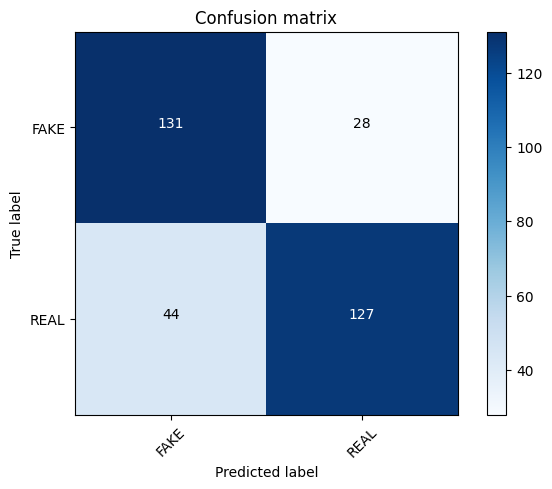

In [24]:
classifier.fit(x1_train, y_train)
pred = classifier.predict(x1_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [26]:
classifier.fit(x1_train, y_train)
pred = classifier.predict(x1_test)
score = metrics.accuracy_score(y_test, pred)
score

0.7818181818181819

In [27]:
classifier=MultinomialNB(alpha=0.1)

In [28]:

previous_score=0
for alpha in np.arange(0,1,0.1):
    sub_classifier=MultinomialNB(alpha=alpha)
    sub_classifier.fit(x1_train,y_train)
    y_pred=sub_classifier.predict(x1_test)
    score = metrics.accuracy_score(y_test, y_pred)
    if score>previous_score:
        classifier=sub_classifier
    print("Alpha: {}, Score : {}".format(alpha,score))

Alpha: 0.0, Score : 0.7575757575757576
Alpha: 0.1, Score : 0.7666666666666667
Alpha: 0.2, Score : 0.7636363636363637
Alpha: 0.30000000000000004, Score : 0.7666666666666667
Alpha: 0.4, Score : 0.7696969696969697
Alpha: 0.5, Score : 0.7757575757575758
Alpha: 0.6000000000000001, Score : 0.7727272727272727
Alpha: 0.7000000000000001, Score : 0.7757575757575758
Alpha: 0.8, Score : 0.7818181818181819
Alpha: 0.9, Score : 0.7818181818181819


/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:629: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:635: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(


In [29]:
# ---> Check hashing vectorizer.


In [30]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

In [62]:
### Vocabulary size
voc_size=2000

In [ ]:
# Onehot Representation

onehot_repr=[one_hot(words,voc_size)for words in corpus]
onehot_repr

In [64]:
sent_length=10
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[   0    0    0 ... 1773  465 1940]
 [   0    0    0 ...    0   27 1093]
 [   0    0    0 ...  240  422  169]
 ...
 [   0    0    0 ...  104 1900  769]
 [   0  489  397 ...  671  375  533]
 [1647 1354  650 ...  323  901 1113]]


In [65]:
## Creating model
embedding_vector_features=20
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(LSTM(100))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 10, 20)            40000     
                                                                 
 lstm_2 (LSTM)               (None, 100)               48400     
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 88,501
Trainable params: 88,501
Non-trainable params: 0
_________________________________________________________________
None


In [66]:
len(embedded_docs),y.shape

(1000, (1000,))

In [67]:
import numpy as np
X_final=np.array(embedded_docs)
y_final=np.array(y)

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=42)

In [73]:
from tensorflow.keras.layers import Dropout
## Creating model
embedding_vector_features=40
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(Dropout(0.3))
model.add(LSTM(100))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [80]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=30,batch_size=64)

Epoch 1/30
11/11 [==============================] - 1s 55ms/step - loss: 0.0412 - accuracy: 0.9881 - val_loss: 1.2720 - val_accuracy: 0.7212
Epoch 2/30
11/11 [==============================] - 0s 41ms/step - loss: 0.0374 - accuracy: 0.9881 - val_loss: 1.3228 - val_accuracy: 0.7212
Epoch 3/30
11/11 [==============================] - 0s 36ms/step - loss: 0.0396 - accuracy: 0.9836 - val_loss: 1.4281 - val_accuracy: 0.7424
Epoch 4/30
11/11 [==============================] - 0s 33ms/step - loss: 0.0397 - accuracy: 0.9866 - val_loss: 1.3303 - val_accuracy: 0.7424
Epoch 5/30
11/11 [==============================] - 1s 58ms/step - loss: 0.0319 - accuracy: 0.9910 - val_loss: 1.2553 - val_accuracy: 0.7303
Epoch 6/30
11/11 [==============================] - 0s 28ms/step - loss: 0.0341 - accuracy: 0.9881 - val_loss: 1.3872 - val_accuracy: 0.7212
Epoch 7/30
11/11 [==============================] - 0s 18ms/step - loss: 0.0354 - accuracy: 0.9896 - val_loss: 1.5220 - val_accuracy: 0.7212
Epoch 8/30
11

In [81]:
predicted_probabilities = model.predict(X_test)
y_pred = np.argmax(predicted_probabilities, axis=-1)

11/11 [==============================] - 0s 2ms/step


In [82]:
from sklearn.metrics import confusion_matrix

In [83]:
confusion_matrix(y_test,y_pred)

array([[173,   0],
       [157,   0]])

In [84]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.5242424242424243


# Sentiment Analysis


1.   Sentiment analysis, also referred to as opinion mining, is an approach to natural language processing (NLP) that identifies the emotional tone behind a body of text. This is a popular way for organizations to determine and categorize opinions about a product, service, or idea.

2.   Sentiment analysis systems help organizations gather insights from unorganized and unstructured text that comes from online sources such as emails, blog posts, support tickets, web chats, social media channels, forums and comments.

3.   It helps to the organazation to overview response of product though online platforms.

4. Automatic Approach: This approach works on the machine learning technique. Firstly, the datasets are trained and predictive analysis is done. The next process is the extraction of words from the text is done. This text extraction can be done using different techniques such as Naive Bayes,Support Vector,PipeLine, Deep Learning like this machine learning techniques are used.






# Twitter Sentiment


1.   Twitter sentiment analysis allows you to keep track of what’s being said about your product or service on social media, and can help you detect angry customers or negative mentions before they they escalate.
2.  Tweets are often useful in generating a vast amount of sentiment data upon analysis. These data are useful in understanding the opinion of the people about a variety of topics.

